In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def informacion(df):
    rows = len(df)
    duplicates = df.duplicated().any()
    nan = df.isna().any()
    print(f"Cantidad de Regitros: {rows}\n")
    print(f"Hay valores duplicados? {duplicates}\n")
    print(f"Hay valores nulos?\n{nan}") 

# Analisis exploratorio de datos

### Customers Data

In [3]:
df_customers = pd.read_excel("data\CustomersData.xlsx")

In [4]:
df_customers.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [6]:
informacion(df_customers)

Cantidad de Regitros: 1468

Hay valores duplicados? False

Hay valores nulos?
CustomerID       False
Gender           False
Location         False
Tenure_Months    False
dtype: bool


In [7]:
for i in ["Gender", "Location"]:
    print(i + ":")
    print(df_customers[i].value_counts())
    print("----------------------")

Gender:
F    934
M    534
Name: Gender, dtype: int64
----------------------
Location:
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: Location, dtype: int64
----------------------


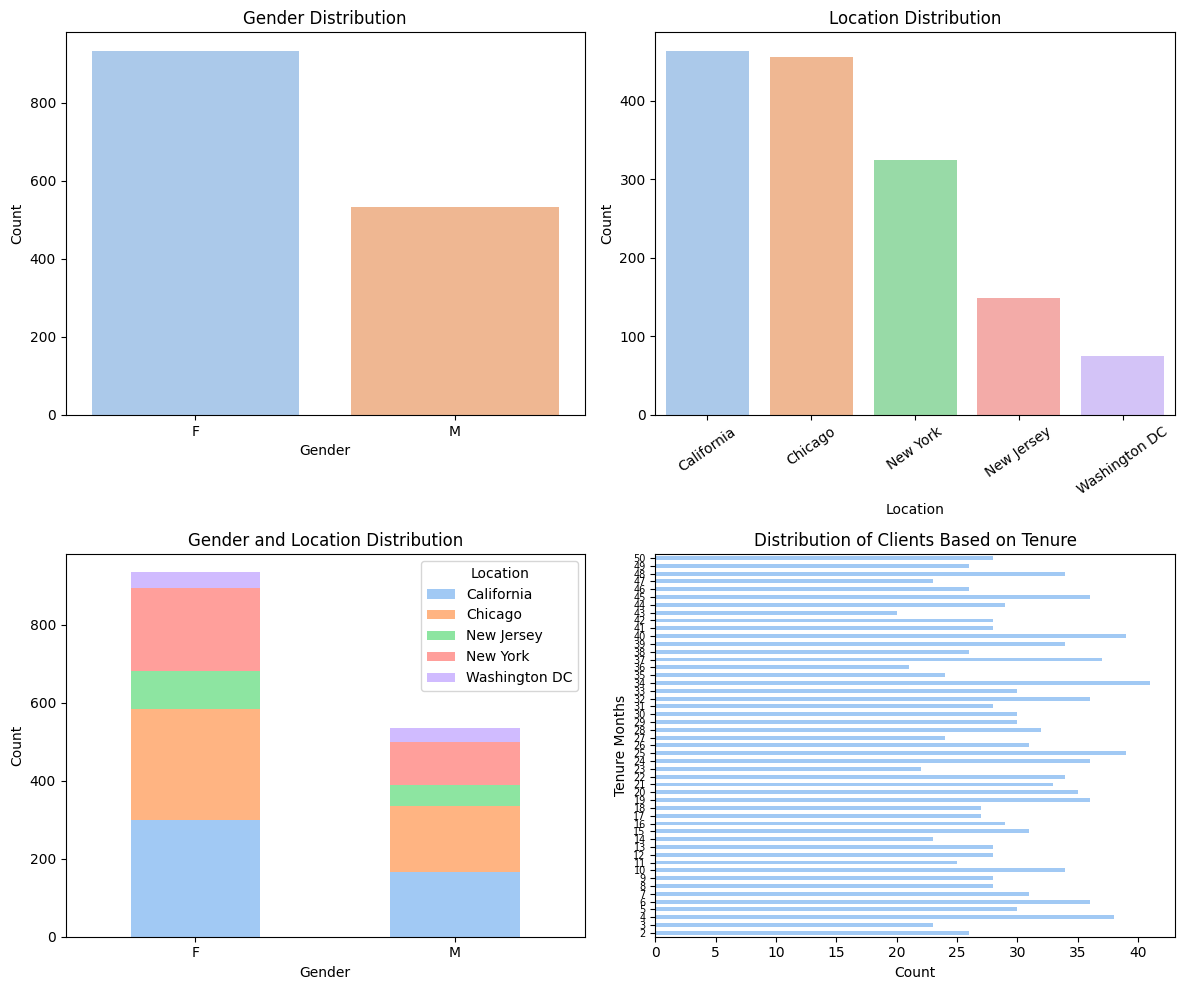

In [8]:
sns.set_palette("pastel")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Gender Distribution
gender_distribution = df_customers['Gender'].value_counts()
sns.barplot(x=gender_distribution.index, y=gender_distribution, hue=gender_distribution.index, ax=axes[0, 0])
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].tick_params(axis='x', rotation=0)

# Plot 2: Location Distribution
location_distribution = df_customers['Location'].value_counts()
sns.barplot(x=location_distribution.index, y=location_distribution, hue=location_distribution.index, ax=axes[0, 1])
axes[0, 1].set_xlabel('Location')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Location Distribution')
axes[0, 1].tick_params(axis='x', rotation=35)

# Plot 3: Gender and Location Distribution
gender_location_counts = df_customers.groupby(['Gender', 'Location']).size().unstack(fill_value=0)
gender_location_counts.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Gender and Location Distribution')
axes[1, 0].tick_params(axis='x', rotation=0)

# Plot 4: Distribution of Clients Based on Tenure
df_top_tenure = df_customers[["Tenure_Months", "CustomerID"]]
tenure_counts = df_top_tenure.groupby("Tenure_Months").count()
tenure_counts.plot(kind="barh", legend=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Tenure Months')
axes[1, 1].set_title('Distribution of Clients Based on Tenure')
axes[1, 1].tick_params(axis='y', labelsize=7)

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()

### Discount Coupon

In [9]:
df_discount = pd.read_csv("data\Discount_Coupon.csv")

In [10]:
df_discount.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [11]:
df_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [12]:
informacion(df_discount)

Cantidad de Regitros: 204

Hay valores duplicados? False

Hay valores nulos?
Month               False
Product_Category    False
Coupon_Code         False
Discount_pct        False
dtype: bool


In [13]:
for i in ["Product_Category", "Coupon_Code", "Month"]:
    print(i + ":")
    print(df_discount[i].value_counts())
    print("----------------------")

Product_Category:
Apparel                 12
Waze                    12
Notebooks & Journals    12
Gift Cards              12
Accessories             12
Housewares              12
Nest-Canada             12
Bottles                 12
Nest                    12
Nest-USA                12
Headgear                12
Notebooks               12
Bags                    12
Lifestyle               12
Drinkware               12
Office                  12
Android                 12
Name: Product_Category, dtype: int64
----------------------
Coupon_Code:
EXTRA10    8
EXTRA20    8
EXTRA30    8
SALE10     4
ACC20      4
BT20       4
BT30       4
NCA10      4
NCA20      4
NCA30      4
HOU10      4
HOU20      4
HOU30      4
ACC10      4
GC10       4
ACC30      4
WEMP30     4
GC20       4
GC30       4
NJ10       4
NJ20       4
NJ30       4
AND10      4
AND20      4
BT10       4
WEMP10     4
WEMP20     4
SALE20     4
SALE30     4
ELEC10     4
ELEC20     4
ELEC30     4
OFF10      4
OFF20      4
OFF30   

### Marketing Spends

In [14]:
df_marketing = pd.read_csv("data/Marketing_Spend.csv")

In [15]:
df_marketing.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [16]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [17]:
informacion(df_marketing)

Cantidad de Regitros: 365

Hay valores duplicados? False

Hay valores nulos?
Date             False
Offline_Spend    False
Online_Spend     False
dtype: bool


In [18]:
df_marketing["Total_Spend"] = df_marketing["Offline_Spend"] + df_marketing["Online_Spend"] 
df_marketing['Date'] = pd.to_datetime(df_marketing['Date'])

In [19]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
 3   Total_Spend    365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 11.5 KB


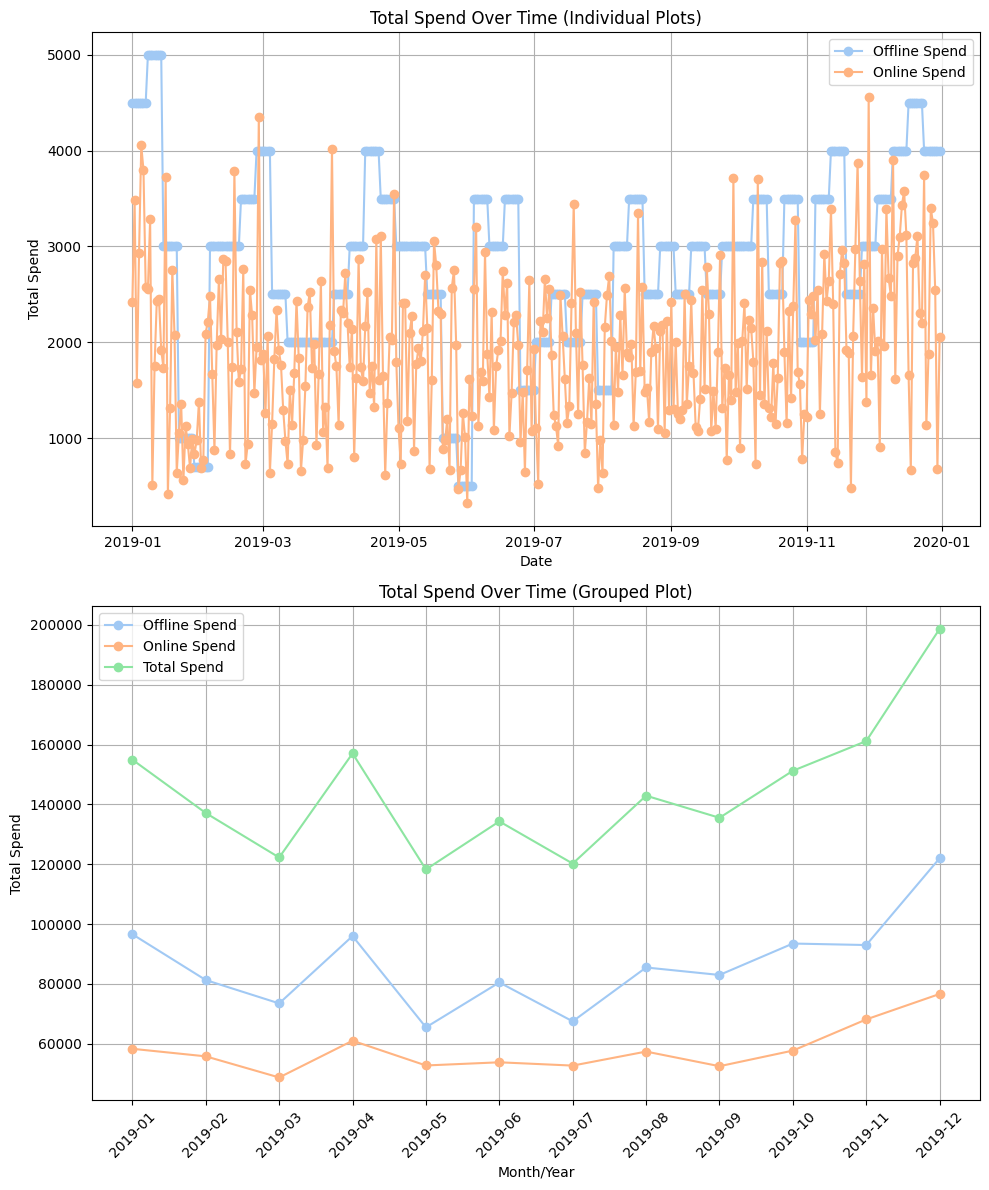

In [20]:
import matplotlib.pyplot as plt
# Grouping by month and plotting in a subplot
df_grouped = df_marketing.groupby(df_marketing['Date'].dt.to_period("M")).agg({
    'Offline_Spend': 'sum',
    'Online_Spend': 'sum',
    'Total_Spend': 'sum'}) 

# Create a subplot with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Line chart for each spend type
axs[0].plot(df_marketing['Date'], df_marketing['Offline_Spend'], marker='o', linestyle='-', label='Offline Spend')
axs[0].plot(df_marketing['Date'], df_marketing['Online_Spend'], marker='o', linestyle='-', label='Online Spend')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Total Spend')
axs[0].set_title('Total Spend Over Time (Individual Plots)')
axs[0].grid(True)
axs[0].legend()

# Plot 2: Grouped bar chart for total spend
axs[1].plot(df_grouped.index.astype(str), df_grouped['Offline_Spend'], marker='o', linestyle='-', label='Offline Spend')
axs[1].plot(df_grouped.index.astype(str), df_grouped['Online_Spend'], marker='o', linestyle='-', label='Online Spend')
axs[1].plot(df_grouped.index.astype(str), df_grouped['Total_Spend'], marker='o', linestyle='-', label='Total Spend')
axs[1].set_xlabel('Month/Year')
axs[1].set_ylabel('Total Spend')
axs[1].set_title('Total Spend Over Time (Grouped Plot)')
axs[1].grid(True)
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### Tax Amount

In [21]:
df_tax = pd.read_excel("data/Tax_amount.xlsx")

In [22]:
df_tax.head(20)

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [23]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [24]:
informacion(df_tax)

Cantidad de Regitros: 20

Hay valores duplicados? False

Hay valores nulos?
Product_Category    False
GST                 False
dtype: bool


### Online Sales

In [25]:
df_sales = pd.read_csv("data/Online_Sales.csv")

In [26]:
df_sales['Transaction_Date'] = pd.to_datetime(df_sales['Transaction_Date'])

In [27]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [28]:
informacion(df_sales)

Cantidad de Regitros: 52924

Hay valores duplicados? False

Hay valores nulos?
CustomerID             False
Transaction_ID         False
Transaction_Date       False
Product_SKU            False
Product_Description    False
Product_Category       False
Quantity               False
Avg_Price              False
Delivery_Charges       False
Coupon_Status          False
dtype: bool


In [29]:
for i in ["CustomerID", "Transaction_Date", "Product_SKU", "Product_Category", "Coupon_Status"]:
    print(i + ":")
    print(df_sales[i].value_counts().head(10))
    print("----------------------")

CustomerID:
12748    695
15311    587
14606    575
17841    572
14911    523
13089    366
15039    315
17850    297
14646    290
13081    261
Name: CustomerID, dtype: int64
----------------------
Transaction_Date:
2019-11-27    335
2019-07-13    311
2019-08-16    298
2019-08-02    292
2019-07-31    291
2019-08-11    289
2019-09-06    278
2019-12-18    274
2019-07-17    269
2019-08-22    264
Name: Transaction_Date, dtype: int64
----------------------
Product_SKU:
GGOENEBJ079499    3511
GGOENEBQ078999    3328
GGOENEBB078899    3230
GGOENEBQ079099    1361
GGOENEBQ084699    1089
GGOENEBQ079199    1065
GGOENEBQ086799     844
GGOEGFKQ020399     806
GGOENEBQ086499     599
GGOEGDHC018299     583
Name: Product_SKU, dtype: int64
----------------------
Product_Category:
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear            

# Business Objective:
The e-commerce company is expecting below analysis using the data:

## Calculate Invoice amount or sale_amount or revenue for each transaction and item level

- **Invoice Value:** *(( Quantity * Avg_price) (1 - Dicount_pct) * (1 + GST)) + Delivery_Charges*

In [31]:
df_sales['Transaction_Date'] = pd.to_datetime(df_sales['Transaction_Date'], format='%m/%d/%Y')
df_sales['Month'] = df_sales['Transaction_Date'].dt.strftime('%b')


In [32]:
df_aux1 = df_sales.drop(columns=["CustomerID", "Product_SKU", "Product_Description"])
result = pd.merge(df_aux1, df_discount, on=['Month', 'Product_Category'], how='left')
merged_df = pd.merge(result,df_tax,on=['Product_Category'], how = 'left')


In [33]:
merged_df["Coupon_Code"].fillna("NoCupon", inplace=True)
merged_df["Discount_pct"].fillna(0, inplace=True)


In [34]:
merged_df['Revenue'] = np.where(
    merged_df['Coupon_Status'] == 'Used',
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 - merged_df['Discount_pct']/100) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges'],
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges']
)


In [35]:
df_sales["Revenue"] = merged_df["Revenue"]

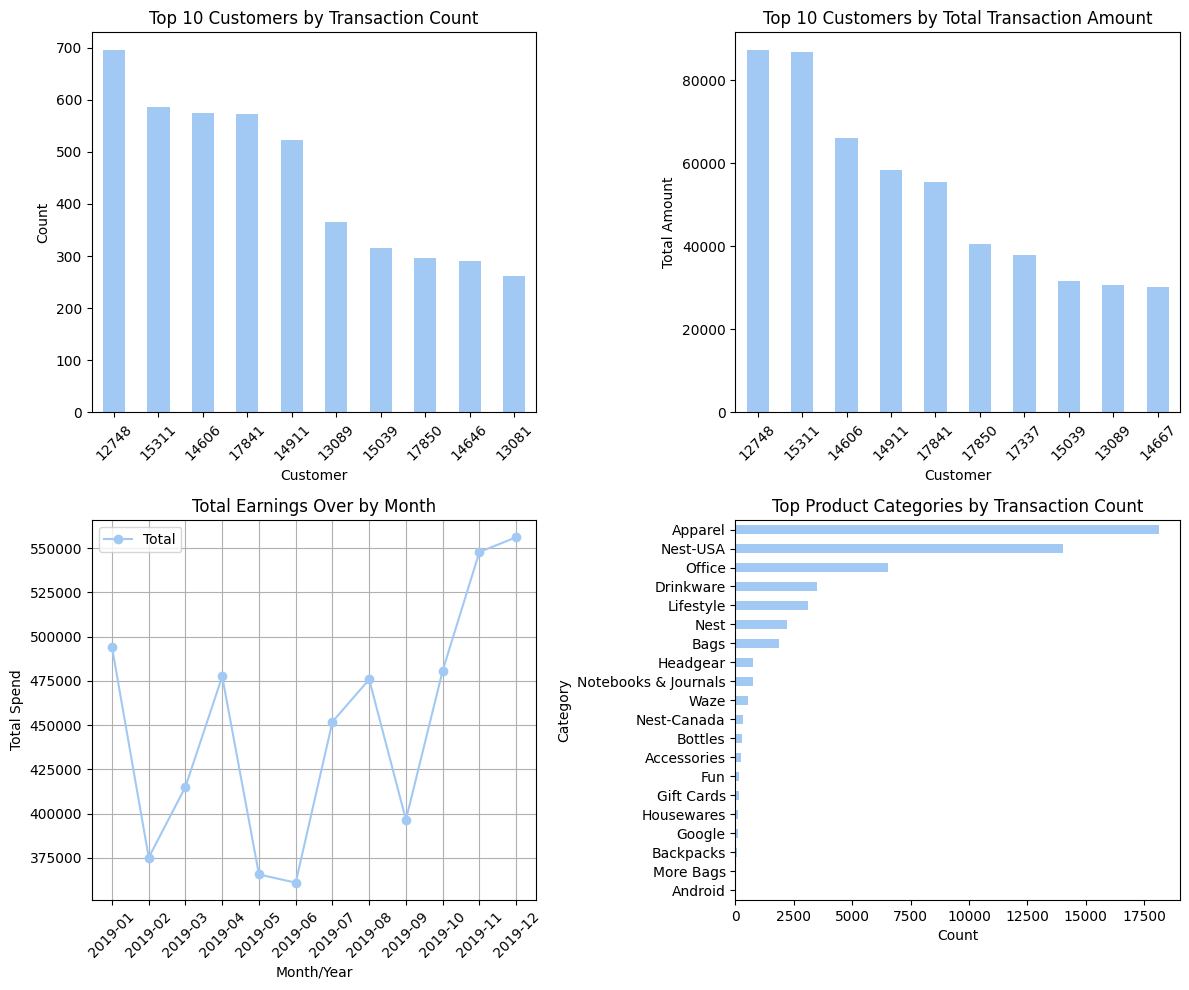

In [36]:
# Set up a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

df_sales['CustomerID'].value_counts().head(10).plot(kind='bar', ax=axs[0,0])
axs[0, 0].set_xlabel('Customer')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Top 10 Customers by Transaction Count')
axs[0, 0].tick_params(axis='x', rotation=45)

customer_by_money = df_sales[['CustomerID', 'Revenue']]
customer_by_money.groupby(by='CustomerID').sum()['Revenue'].sort_values(ascending=False).head(10).plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_xlabel('Customer')
axs[0, 1].set_ylabel('Total Amount')
axs[0, 1].set_title('Top 10 Customers by Total Transaction Amount')
axs[0, 1].tick_params(axis='x', rotation=45)

df_date_total = df_sales[['Transaction_Date', 'Revenue']]
df_date_total = df_date_total.groupby(df_date_total['Transaction_Date'].dt.to_period("M")).agg({
    'Revenue': 'sum'})
axs[1, 0].plot(df_date_total.index.astype(str), df_date_total['Revenue'], marker='o', linestyle='-', label='Total')
axs[1, 0].set_xlabel('Month/Year')
axs[1, 0].set_ylabel('Total Spend')
axs[1, 0].set_title('Total Earnings Over by Month')
axs[1, 0].grid(True)
axs[1, 0].legend()
axs[1, 0].tick_params(axis='x', rotation=45)

df_sales['Product_Category'].value_counts(ascending=True).plot(kind='barh', ax=axs[1, 1])
axs[1, 1].set_xlabel('Count')
axs[1, 1].set_ylabel('Category')
axs[1, 1].set_title('Top Product Categories by Transaction Count')

plt.tight_layout()
plt.show()

### Understand the retention of customers on month on month basis

In [38]:
import datetime as dt
#funcion for month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df_sales["Month"] = df_sales["Transaction_Date"].apply(get_month)

df_sales["Cohort Month"] = df_sales.groupby("CustomerID")["Month"].transform('min')


def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    
    return day, month, year


_, invoice_month, invoice_year = get_date_elements(df_sales, "Month")
_, cohort_month, cohort_year = get_date_elements(df_sales, "Cohort Month")


year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
df_sales["CohortIndex"] = year_diff * 12 + month_diff + 1

cohort_data = df_sales.groupby(["Cohort Month", "CohortIndex"])["CustomerID"].apply(pd.Series.nunique)

cohort_table = cohort_data.reset_index().pivot(index="Cohort Month", columns="CohortIndex", values="CustomerID")

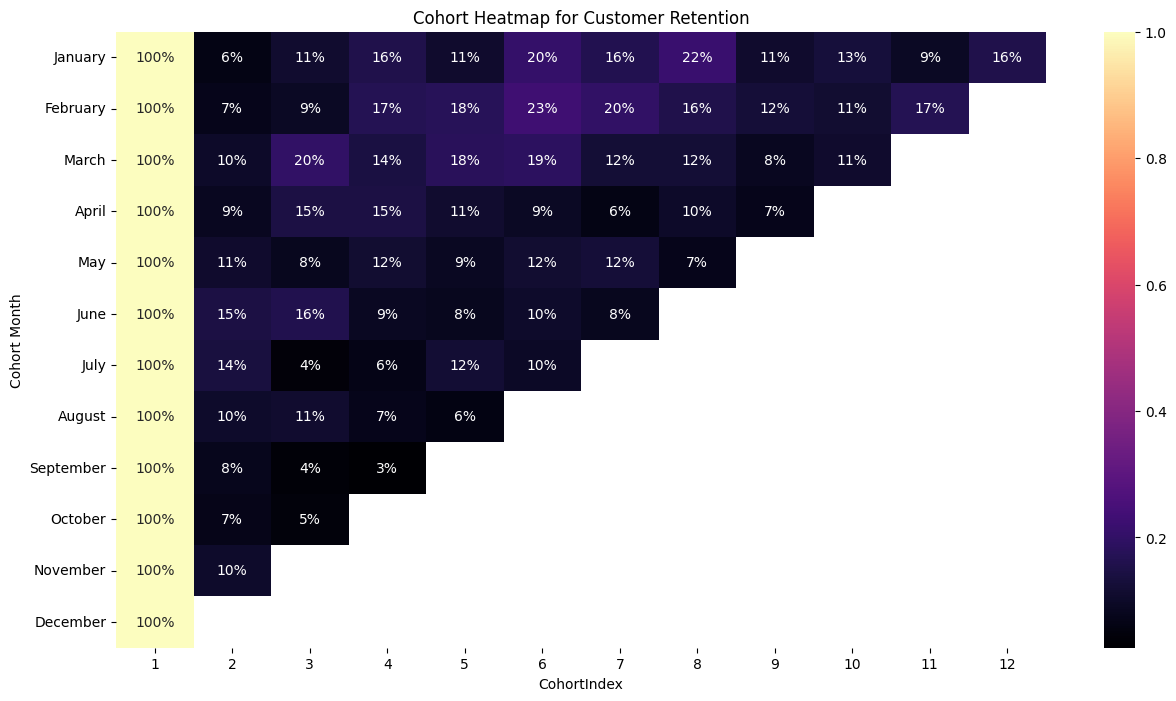

In [54]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis=0)
new_cohort_table.index = new_cohort_table.index.strftime("%B") 
plt.figure(figsize=(15, 8))
plt.title("Cohort Heatmap for Customer Retention")
sns.heatmap(new_cohort_table, annot=True, cmap="magma", fmt=".0%")
plt.show()

## Perform Detailed exploratory analysis
### Understanding how many customers acquired every month

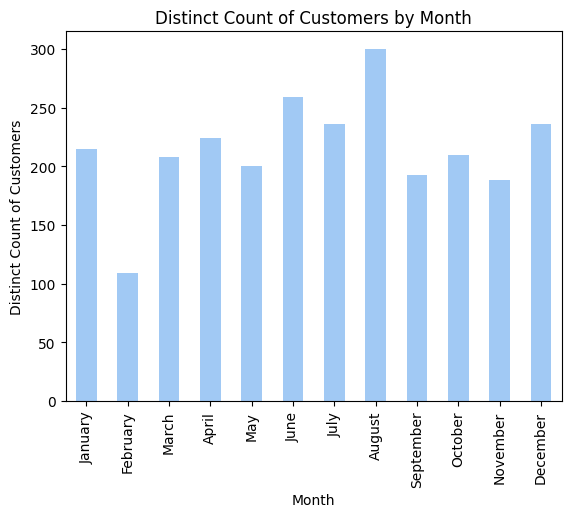

In [40]:
distinct_count = df_sales.groupby("Month")['CustomerID'].nunique()
distinct_count.index = distinct_count.index.strftime("%B") 

distinct_count.plot(kind="bar")
plt.xlabel('Month')
plt.ylabel('Distinct Count of Customers')
plt.title('Distinct Count of Customers by Month')
plt.show()

### How the revenues from existing/new customers on month on month basis

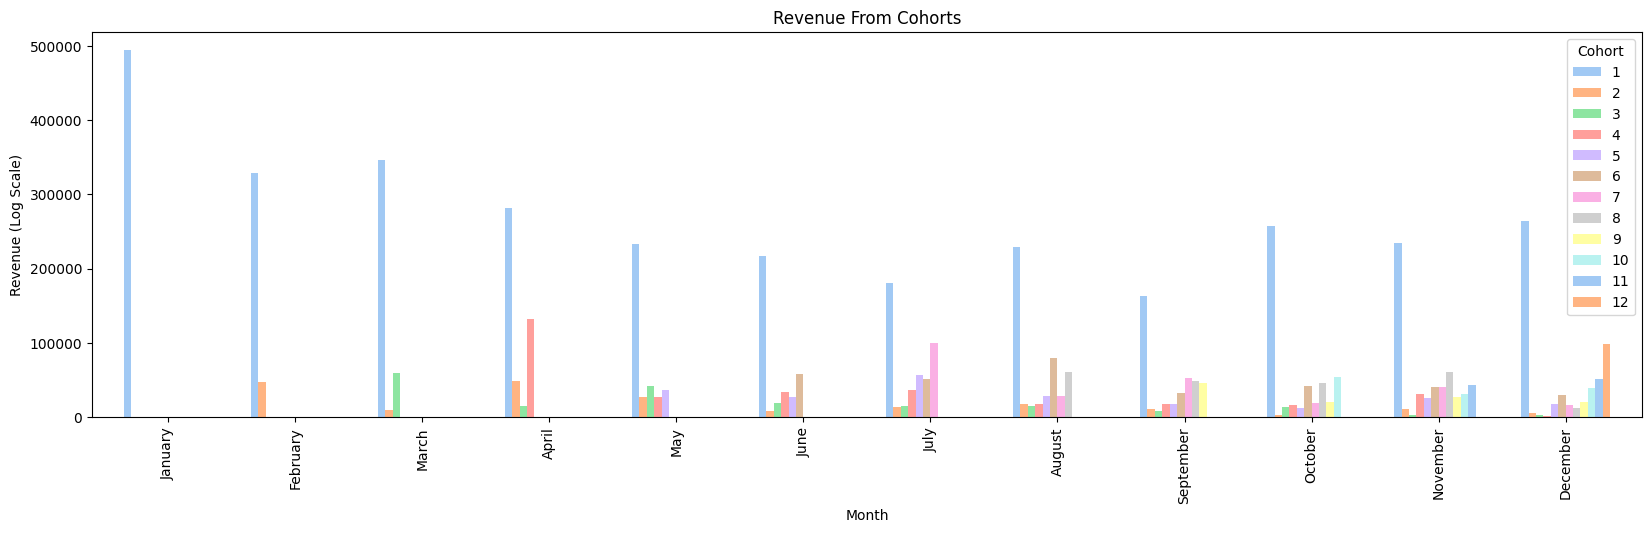

In [81]:
# Your existing code for data preparation
rev_cohort_month = df_sales.groupby(["CohortIndex", "Month"])["Revenue"].sum().reset_index()
rev_cohort_pivot = rev_cohort_month.pivot(index="Month", columns="CohortIndex", values="Revenue")
rev_cohort_pivot.index = rev_cohort_pivot.index.strftime("%B")

# Plotting with a logarithmic scale for the y-axis
rev_cohort_pivot.plot(kind="bar", width=0.7, figsize=(20, 5))

plt.xlabel("Month")
plt.ylabel("Revenue (Log Scale)")
plt.title("Revenue From Cohorts")
plt.legend(title="Cohort", loc="best", bbox_to_anchor=(1,1))

plt.show()

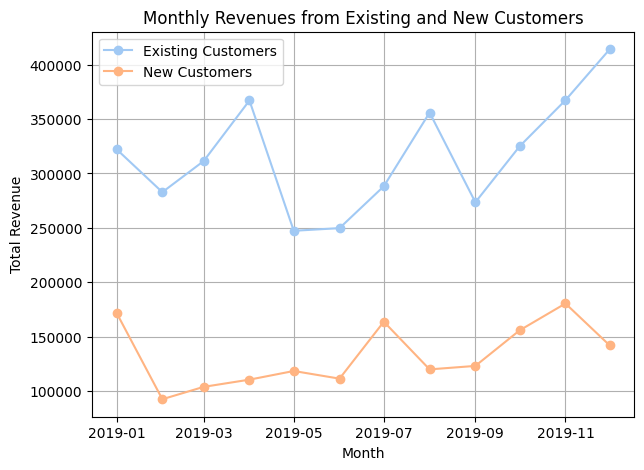

In [284]:
def customer_age(x):
    if x >= 24:
        customer = "old"
    else:
        customer = "new"
    return customer

df_customers["Customer_age"] = df_customers["Tenure_Months"].apply(customer_age)
df_aux = pd.merge(df_sales, df_customers, on="CustomerID", how="left")
df_grouped = df_aux.groupby(["CustomerID", "Customer_age", "Month"])["Revenue"].sum().reset_index()


existing_customers = df_grouped[df_grouped["Customer_age"] == "old"]
new_customers = df_grouped[df_grouped["Customer_age"] == "new"]
existing_customers_monthly = existing_customers.groupby("Month")["Revenue"].sum()
new_customers_monthly = new_customers.groupby("Month")["Revenue"].sum()


plt.figure(figsize=(7, 5))
plt.plot(existing_customers_monthly.index, existing_customers_monthly, label='Existing Customers (24+ months)', marker='o', linestyle='-')
plt.plot(new_customers_monthly.index, new_customers_monthly, label='New Customers (0-23 months)', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.title('Monthly Revenues from Existing and New Customers')
plt.legend()
plt.show()

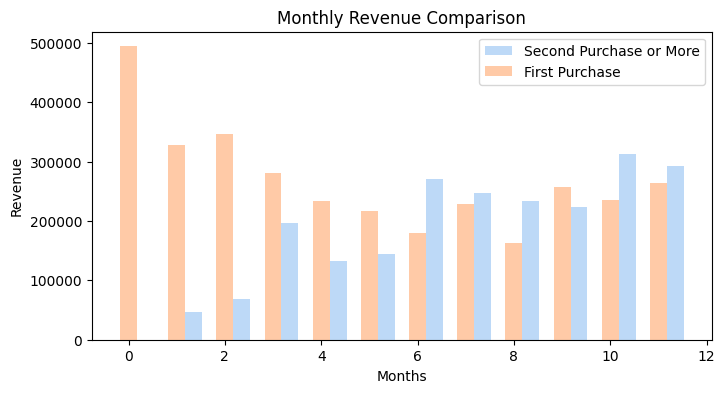

In [289]:
temp = []
new_cust_each_month = {}
existing_cust_each_month = {}

no_of_new_cust_each_month = {}
no_of_existing_cust_each_month = {}

for i in df_sales['Month'].unique():
   x = df_sales[df_sales['Month']==i]['CustomerID'].unique().tolist()
   new_cust = [value for value in x if value not in temp]
   existing_cust = [value for value in x if value in temp]
   temp.extend(x)
   temp = list(set(temp))
   new_cust_each_month[i] = new_cust
   existing_cust_each_month[i] = existing_cust
   no_of_new_cust_each_month = len(new_cust)
   no_of_existing_cust_each_month = len(existing_cust)
   
new_cust_each_month_revenue = {}
existing_cust_each_month_revenue = {}

for month, ids in new_cust_each_month.items():
    new_cust_each_month_revenue[month] = df_sales[(df_sales['Month'] == month) & (df_sales['CustomerID'].isin(ids))]['Revenue'].sum()

for month, ids in existing_cust_each_month.items():
    existing_cust_each_month_revenue[month] = df_sales[(df_sales['Month'] == month) & (df_sales['CustomerID'].isin(ids))]['Revenue'].sum()
    
    
months = list(existing_cust_each_month_revenue.keys())
new_cust = list(new_cust_each_month_revenue.values())
existing_cust = list(existing_cust_each_month_revenue.values())

plt.figure(figsize=(8, 4))
bar_width = 0.35
bar_positions = range(len(months))

plt.bar([pos + bar_width for pos in bar_positions], existing_cust, width=bar_width, label='Second Purchase or More', alpha=0.7)
plt.bar(bar_positions, new_cust, width=bar_width, label='First Purchase', alpha=0.7)


plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')
plt.legend()
plt.show()

### How the discounts playing role in the revenues?

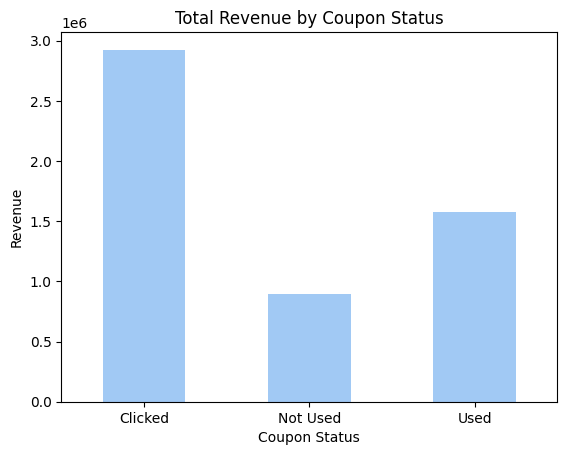

In [42]:
discount_rev = df_sales.groupby("Coupon_Status")["Revenue"].sum()

discount_rev.plot(kind="bar")
plt.xlabel("Coupon Status")
plt.ylabel("Revenue")
plt.title("Total Revenue by Coupon Status")
plt.xticks(rotation=0) 

plt.show()

### Understand the trends/seasonality of sales by category, location, month etc…

In [89]:
df_aux = pd.merge(df_sales, df_customers, on="CustomerID", how="left")

df_grouped = df_aux.groupby(["Location","Month"])["Transaction_ID"].count().reset_index()

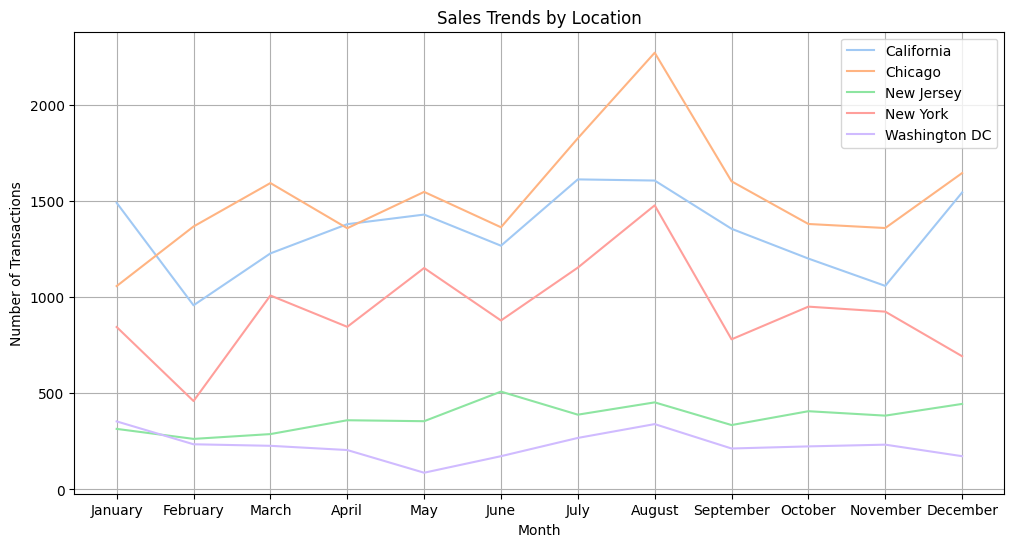

In [99]:
locations = df_grouped['Location'].unique()

df_grouped['Month'] = df_grouped['Month'].dt.month_name()

locations = df_grouped['Location'].unique()

plt.figure(figsize=(12, 6))

for location in locations:
    location_data = df_grouped[df_grouped['Location'] == location]
    plt.plot(location_data['Month'], location_data['Transaction_ID'], label=location)

plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Sales Trends by Location')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
unique_categories = df_grouped['Product_Category'].unique()
num_categories = len(unique_categories)
num_cols = 4  
num_rows = 5  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharey=False)

for i, category in enumerate(unique_categories):
    row = i // num_cols
    col = i % num_cols

    category_data = df_grouped[df_grouped['Product_Category'] == category]
    
    normalized_data = (category_data['Transaction_ID'] - category_data['Transaction_ID'].min()) / (category_data['Transaction_ID'].max() - category_data['Transaction_ID'].min())

    axes[row, col].bar(category_data['Month'], normalized_data, label=category)  
    axes[row, col].set_title(category)
    axes[row, col].legend()

    axes2 = axes[row, col].twinx()
    axes2.set_ylim(normalized_data.min(), normalized_data.max())
    axes2.get_yaxis().set_visible(False)

    axes[row, col].tick_params(axis='x', rotation=45)
plt.title("Sales Trend By Category")
plt.tight_layout()
plt.show()

### How number order varies and sales with different days?


In [158]:
df_aux = df_sales[["Transaction_Date", "Revenue", "Transaction_ID"]].copy()

In [160]:
df_aux['Transaction_Date'] = pd.to_datetime(df_aux['Transaction_Date'])
df_aux['Day_of_Week'] = df_aux['Transaction_Date'].dt.day_name()
daily_revenue = df_aux.groupby('Day_of_Week')['Revenue'].sum()
daily_num_order = df_aux.groupby('Day_of_Week')['Transaction_ID'].count()

days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue.index = pd.Categorical(daily_revenue.index, categories=days_of_week_order, ordered=True)
daily_num_order.index = pd.Categorical(daily_num_order.index, categories=days_of_week_order, ordered=True)

daily_revenue = daily_revenue.sort_index()
daily_num_order = daily_num_order.sort_index()

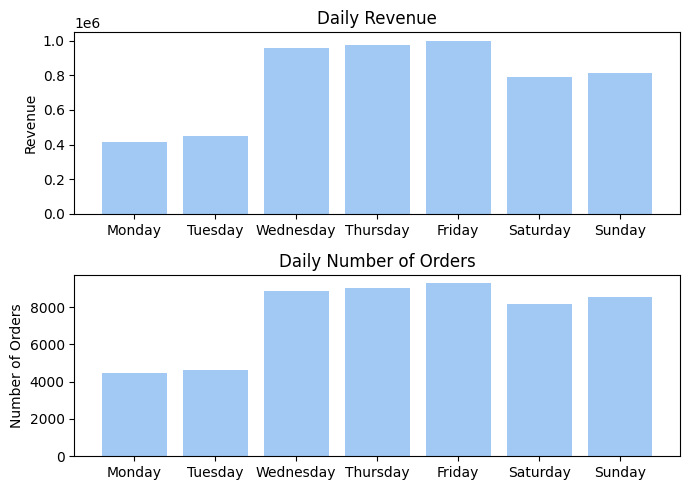

In [168]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
ax1.bar(daily_revenue.index, daily_revenue)
ax1.set_title('Daily Revenue')
ax1.set_ylabel('Revenue')
ax2.bar(daily_num_order.index, daily_num_order)
ax2.set_title('Daily Number of Orders')
ax2.set_ylabel('Number of Orders')
plt.tight_layout()
plt.show()

### How marketing spend is impacting on revenue?

In [181]:
df_date_total = df_sales[['Transaction_Date', 'Revenue']]
df_date_total = df_date_total.groupby(df_date_total['Transaction_Date'].dt.to_period("M")).agg({
    'Revenue': 'sum'})

df_grouped = df_marketing.groupby(df_marketing['Date'].dt.to_period("M")).agg({
    'Total_Spend': 'sum'}) 

merged_df = df_grouped.merge(df_date_total, left_index=True, right_index=True)


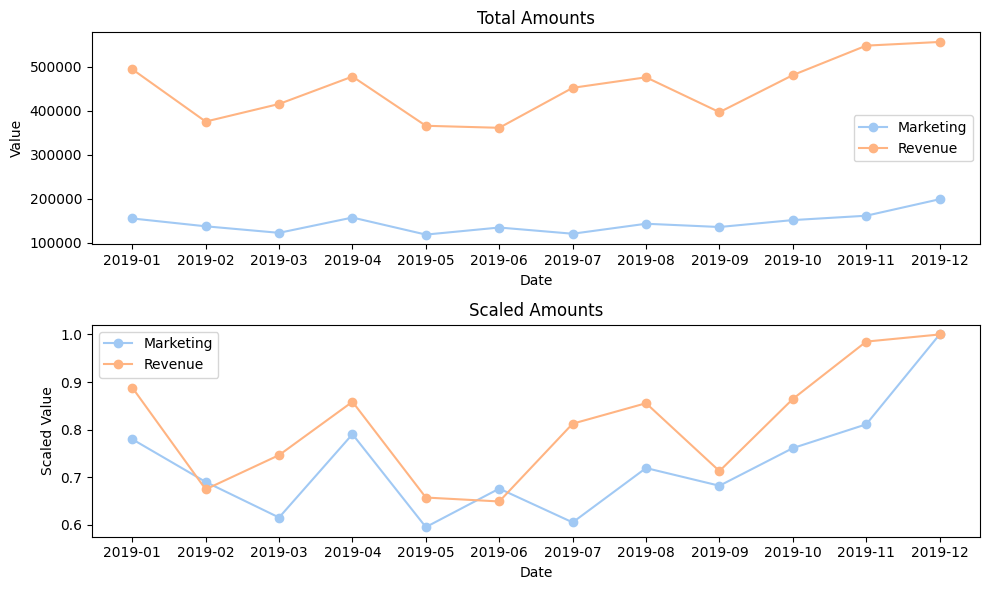

In [192]:
# Assuming merged_df is your merged DataFrame
merged_df.index = merged_df.index.astype(str)

# Scale the columns by dividing by their respective maximum values
scaled_df = merged_df.div(merged_df.max())
scaled_df.index = scaled_df.index.astype(str)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Plot the original data
axes[0].plot(merged_df['Total_Spend'], label='Marketing', marker='o')
axes[0].plot(merged_df['Revenue'], label='Revenue', marker='o')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].set_title('Total Amounts')
axes[0].legend()

# Plot the scaled data
axes[1].plot(scaled_df['Total_Spend'], label='Marketing', marker='o')
axes[1].plot(scaled_df['Revenue'], label='Revenue', marker='o')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Scaled Value')
axes[1].set_title('Scaled Amounts')
axes[1].legend()

# Adjust layout to prevent clipping of ylabel
plt.tight_layout()

# Show the plot
plt.show()

### Which product was appeared in the transactions?

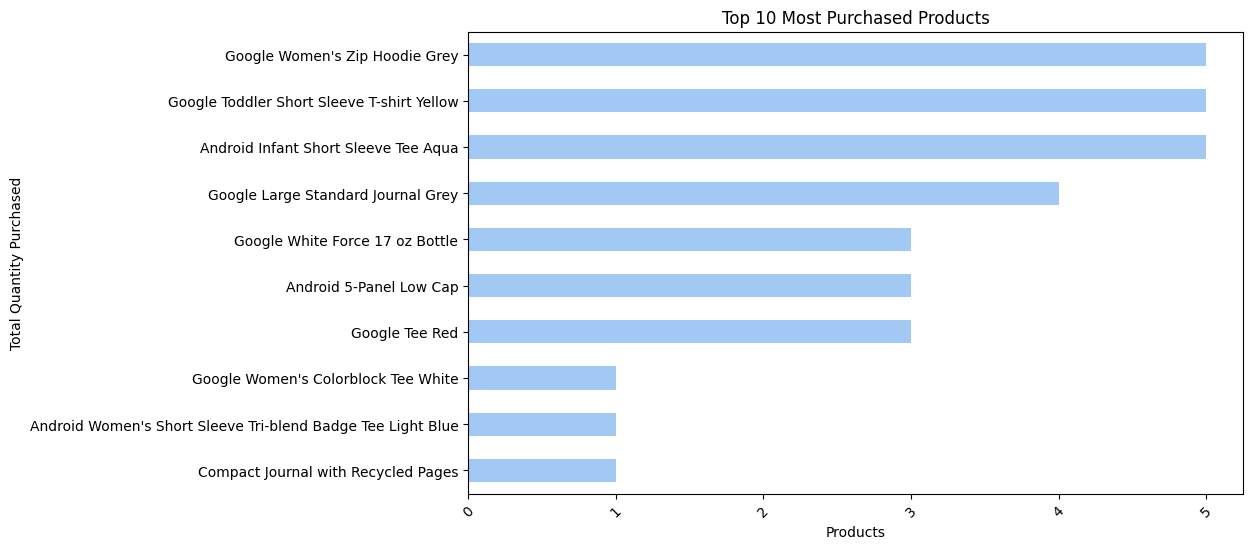

In [294]:
category_quantity = df_sales.groupby(['Product_Description'])['Quantity'].sum()

# Find the category with the highest total quantity
top_10_categories = category_quantity.sort_values().head(10)

# Create a bar chart for the top 10 products
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='barh')
plt.xlabel('Products')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45)
plt.show()

### Which product was purchased mostly based on the quantity?


In [198]:
top10 = top_10_categories.reset_index()
filtered_df = df_sales[df_sales['Product_SKU'].isin(top10['Product_SKU'])]

# Group by 'product_id' and calculate summary statistics
summary_stats = filtered_df.groupby('Product_SKU').agg({
    'Product_Description': 'first',
    'Product_Category': 'first'  ,
     'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()
summary_stats.columns = ['Product ID', 'Product Description', 'Product Category','Quantity','Revenue']

summary_stats

,Product ID,Product Description,Product Category,Quantity,Revenue
0,GGOEGBMJ013399,Sport Bag,Bags,7321,42068.25962
1,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,9728,37418.94532
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,5847,24533.63450
3,GGOEGFSR022099,Google Kick Ball,Lifestyle,5549,15676.89884
4,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,5098,11559.08054
5,GGOEGGOA017399,Maze Pen,Office,16234,19786.07210
6,GGOEGOAQ012899,Ballpoint LED Light Pen,Office,4861,15697.98510
7,GGOEGOLC014299,Google Metallic Notebook Set,Office,6496,41481.37750
8,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,4570,731870.69120
9,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,5206,671620.06650
